### Objective:
Develop an OCR system that reads text from images using OpenCV and Tesseract OCR. The project will include various image preprocessing techniques to enhance the image quality for better OCR accuracy.

Install necessary libraries

In [1]:
pip install opencv-python pillow pytesseract matplotlib

Note: you may need to restart the kernel to use updated packages.


### Load and Display Image:

Load an image using OpenCV and display it using Matplotlib.

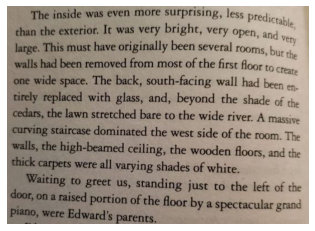

In [2]:
import cv2
import matplotlib.pyplot as plt

image_path = 'Paragraph.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### Image Preprocessing:

- Grayscale Conversion: Convert the image to grayscale.
- Noise Reduction: Use techniques like Gaussian Blur to reduce noise.
- Thresholding: Apply adaptive thresholding to binarize the image.
- Deskewing: Correct any tilt in the image using image rotation.
- Dilation and Erosion: Enhance the structure of text in the image.

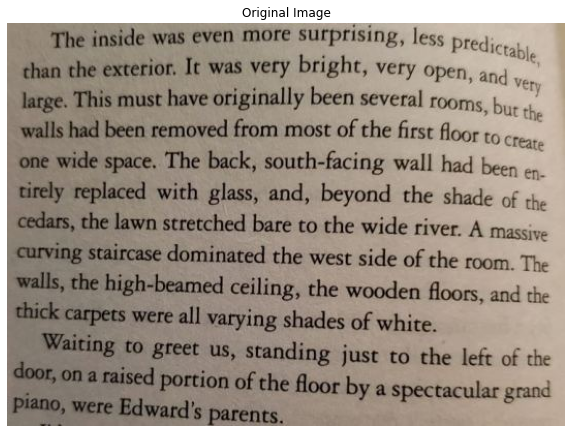

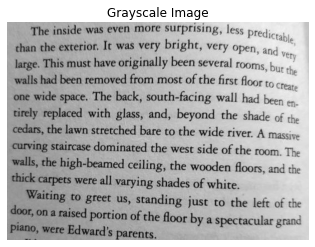

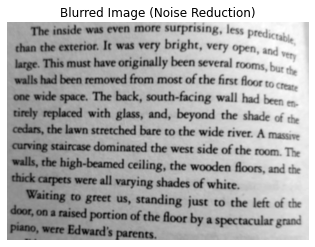

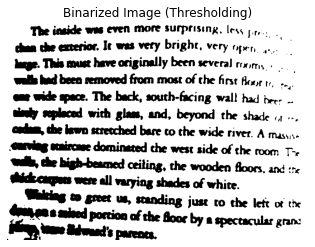

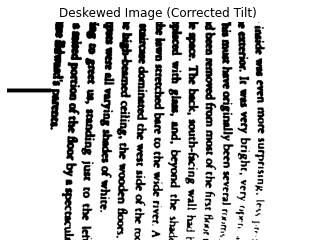

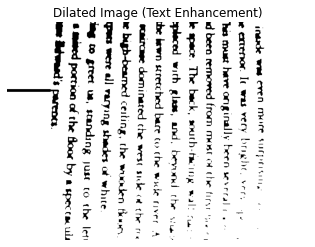

In [4]:
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Grayscale conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Noise reduction using Gaussian Blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blur, cmap='gray')
plt.title('Blurred Image (Noise Reduction)')
plt.axis('off')
plt.show()

# Thresholding (Binarization)
_, binary_img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary_img, cmap='gray')
plt.title('Binarized Image (Thresholding)')
plt.axis('off')
plt.show()

# Deskewing (Correcting image tilt)
coords = cv2.findNonZero(binary_img)
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle

(h, w) = binary_img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
deskewed_img = cv2.warpAffine(binary_img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
plt.imshow(deskewed_img, cmap='gray')
plt.title('Deskewed Image (Corrected Tilt)')
plt.axis('off')
plt.show()

# Dilation (Enhancing text structure)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(deskewed_img, kernel, iterations=1)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image (Text Enhancement)')
plt.axis('off')
plt.show()



### Text Extraction using Tesseract:

Use Tesseract to extract text from the preprocessed image.

Install Tesseract
For Windows:

Download the Tesseract installer from here.

https://github.com/UB-Mannheim/tesseract/wiki
    
Click on "tesseract-ocr-w64-setup-5.4.0.20240606.exe (64 bit)"

In [11]:
!pip install tesseract-ocr

  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr: started
    Running setup.py install for tesseract-ocr: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Sumit Rathod\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Sumit Rathod\\AppData\\Local\\Temp\\pip-install-42qyroi5\\tesseract-ocr_526253329fe04113b98733fb8e5178d2\\setup.py'"'"'; __file__='"'"'C:\\Users\\Sumit Rathod\\AppData\\Local\\Temp\\pip-install-42qyroi5\\tesseract-ocr_526253329fe04113b98733fb8e5178d2\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Sumit Rathod\AppData\Local\Temp\pip-wheel-e3bo6zoy'
       cwd: C:\Users\Sumit Rathod\AppData\Local\Temp\pip-install-42qyroi5\tesseract-ocr_526253329fe04113b98733fb8e5178d2\
  Complete output (10 lines):
  C:\Users\Sumit Rathod\anaconda3\lib\site-packages\setuptool

In [14]:
import pytesseract

In [16]:
# Specify the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Now try running the OCR code
text = pytesseract.image_to_string(dilated)
print("Extracted Text:\n", text)

Extracted Text:
 " KDC ver ye
fis mut have originally been several.
dd been remowed from most of Che first Gee e |
je apace. The back, south-facing wall cu
spaced with glass, and, beyond the sia
the bewn seretched bare to che wide river A
wemcrcase dominated che west side ot the rx
we bagh-beamed ceiting, the wooden Boor
pps were all varying shades of white

img 00 greet us, teanding just to the let
& mived portion of the Boor by a spectat ul

=e



### Visualize the Results:

Display the original and processed images side by side.
Show the extracted text.

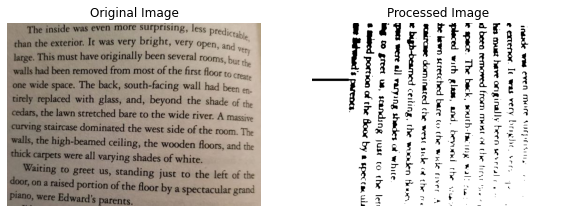

Extracted Text:
 " KDC ver ye
fis mut have originally been several.
dd been remowed from most of Che first Gee e |
je apace. The back, south-facing wall cu
spaced with glass, and, beyond the sia
the bewn seretched bare to che wide river A
wemcrcase dominated che west side ot the rx
we bagh-beamed ceiting, the wooden Boor
pps were all varying shades of white

img 00 greet us, teanding just to the let
& mived portion of the Boor by a spectat ul

=e



In [17]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

print("Extracted Text:\n", text)
